# Nural Network classification with pytorch

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
torch.cuda.is_available()

True

In [3]:
#Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
 torch.cuda.device_count()

1

In [5]:
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [6]:
#Make 1000 samples
n_samples=1000
#Create circles
x, y= make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

In [7]:
len(x), len(y)

(1000, 1000)

In [8]:
print(f"first 5 samples of x:\n {x[:5]}")

first 5 samples of x:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]


In [9]:
print(f"first 5 samples of y:\n {y[:5]}")

first 5 samples of y:
 [1 1 1 1 0]


In [10]:
# make data frame of circle
import pandas as pd
circles=pd.DataFrame({"X1":x[:,0],
                      "X2":x[:,1],
                      "label":y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


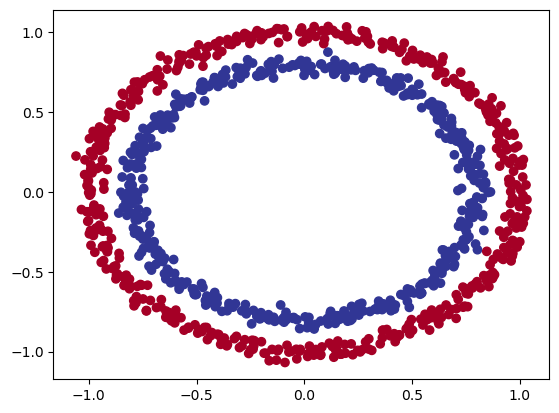

In [11]:
# see our data
plt.scatter(x=x[:,0],
            y=x[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [12]:
x.shape,y.shape

((1000, 2), (1000,))

In [13]:
#View the first example of features and labels
x_sample=x[0]
y_sample=y[0]
print(f"Values for one sample of X: {x_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {x_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### turn data into tensors and create train and test split

In [14]:
type(x),x.dtype

(numpy.ndarray, dtype('float64'))

In [15]:
x=torch.from_numpy(x).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [16]:
x[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [17]:
x.dtype,y.dtype

(torch.float32, torch.float32)

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,
                                          y,
                                           test_size=0.2,
                                           random_state=42)

In [19]:
len(xtrain),len(xtest),len(ytrain),len(ytest)

(800, 200, 800, 200)

In [20]:
xtrain

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

 1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 nn.Linear() layers that are capable of handling the shapes of our data
3. Defines a forward() method that outlines the forward pass (or forward computation)
4. Instatiate an instance of our model class and send it to the target divice

In [21]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        #2. Create 2 nn. Linear layers capable of handling the shapes of our data
        self.layer_1= nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscale to 5 features
        self.layer_2= nn.Linear(in_features=5, out_features=1) # takes in 5 features from previious layer and outputs a single featrure
    #3. Define a forward() method that outlines the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
    #4. Instantiate an instance of our model class and send it to the target device

In [22]:
model_0=CircleModelV0()
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [23]:
#Let's replicate the model above using nn.Sequential()
model_0=nn.Sequential(nn.Linear(in_features=2, out_features=5),
                      nn.Linear(in_features=5, out_features=1)).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [24]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5501, -0.6239],
                      [-0.3165,  0.4305],
                      [-0.4120, -0.6044],
                      [ 0.6570,  0.3388],
                      [ 0.6721, -0.4458]], device='cuda:0')),
             ('0.bias',
              tensor([-0.0864, -0.4171, -0.1891, -0.7030, -0.2180], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0192, -0.1879,  0.2100,  0.3033,  0.3640]], device='cuda:0')),
             ('1.bias', tensor([-0.0605], device='cuda:0'))])

In [25]:
#Make predictions
with torch.inference_mode():
    untrained_preds=model_0(xtest.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(xtest)}, Shape: {xtest.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels: \n{ytest[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.6593],
        [-0.5780],
        [-0.5138],
        [-0.7020],
        [ 0.0551],
        [ 0.1003],
        [-0.1219],
        [ 0.0384],
        [-0.5380],
        [-0.5663]], device='cuda:0')

First 10 predictions:
tensor([[-1.],
        [-1.],
        [-1.],
        [-1.],
        [ 0.],
        [ 0.],
        [-0.],
        [ 0.],
        [-1.],
        [-1.]], device='cuda:0')

First 10 labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

Again... this is problem specific.

For example for regression you might want MAE or MSE (mean absolute error or mean squared error).

For classification you might want binary cross entropy or categorical cross entropy (cross entropy).

As a reminder, the loss function measures how *wrong* your models predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many 
built-in options.

* For the loss function we're going to use `torch.nn.BECWithLogitsLoss()`, for more on what binary cross entropy (BCE)

In [26]:
# set up loss function
loss_fn=nn.BCEWithLogitsLoss()

# set optimizer
optimizer = torch.optim.SGD(model_0.parameters(),lr=0.1)

In [27]:
#Calculate accuracy -out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
    correct=torch.eq(y_true, y_pred).sum().item()
    acc=(correct/len(y_pred)) * 100
    return acc

### 3.1 Going from raw logits prediction probabilities prediction labels


Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [28]:
# view the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(xtest.to(device))[:5]
y_logits

tensor([[-0.6593],
        [-0.5780],
        [-0.5138],
        [-0.7020],
        [ 0.0551]], device='cuda:0')

In [29]:
# use the sigmoid activation funcyion on our model to turn them into prediction probabilities
y_pread_probs=torch.sigmoid(y_logits)
y_pread_probs

tensor([[0.3409],
        [0.3594],
        [0.3743],
        [0.3314],
        [0.5138]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:

*`y_pred_probs >= 0.5, `y=1` (class 1)

*`y_pred_probs < 0.5, `y=0` (class 0)

In [31]:
#find rhe predicted lables
y_preds=torch.round(y_pread_probs)

# in full
y_pread_lables=torch.round(torch.sigmoid(model_0(xtest.to(device))[:5]))

#check for equality
print(torch.eq(y_preds.squeeze(),y_pread_lables.squeeze()))

y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 1.], device='cuda:0')

In [32]:
ytest[:5]

tensor([1., 0., 1., 0., 1.])

In [33]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of itrations
epochs=100

#put data to target device
xtrain,ytrain=xtrain.to(device),ytrain.to(device)
xtest,ytest=xtest.to(device),ytest.to(device)

# build training annd tesing loop
for epoch in range(epochs):
    ## training 
    model_0.train()

    #forward pass
    y_logits= model_0(xtrain).squeeze()
    y_preds= torch.round(torch.sigmoid(y_logits))

    # calculate loss
    loss=loss_fn(y_logits,ytrain)
    acc=accuracy_fn(ytrain,y_preds)

    # optimizer zero gard
    optimizer.zero_grad()

    #loss backword
    loss.backward()

    #optimizer step
    optimizer.step()

    ###testing 
    model_0.eval()
    with torch.inference_mode():
        #forward pass
        test_logits=model_0(xtest).squeeze()
        test_pred=torch.round(torch.sigmoid(test_logits))

        # calculate loss
        test_loss=loss_fn(test_logits,ytest)
        test_acc=accuracy_fn(ytest,test_pred)
    if epoch% 10 == 0:
        print(f"Epoch: {epoch} | loss: {loss:.4f} | accuracy: {acc:.2f}% | test loss: {test_loss:.4f} | test accuracy {test_acc:.2f}%")

Epoch: 0 | loss: 0.7182 | accuracy: 46.12% | test loss: 0.7145 | test accuracy 46.50%
Epoch: 10 | loss: 0.7072 | accuracy: 48.00% | test loss: 0.7039 | test accuracy 46.50%
Epoch: 20 | loss: 0.7023 | accuracy: 49.25% | test loss: 0.6993 | test accuracy 46.50%
Epoch: 30 | loss: 0.6998 | accuracy: 49.38% | test loss: 0.6971 | test accuracy 46.50%
Epoch: 40 | loss: 0.6983 | accuracy: 49.75% | test loss: 0.6959 | test accuracy 47.00%
Epoch: 50 | loss: 0.6972 | accuracy: 50.12% | test loss: 0.6951 | test accuracy 46.50%
Epoch: 60 | loss: 0.6964 | accuracy: 50.50% | test loss: 0.6947 | test accuracy 47.00%
Epoch: 70 | loss: 0.6958 | accuracy: 50.62% | test loss: 0.6943 | test accuracy 46.50%
Epoch: 80 | loss: 0.6954 | accuracy: 50.38% | test loss: 0.6941 | test accuracy 47.00%
Epoch: 90 | loss: 0.6950 | accuracy: 50.62% | test loss: 0.6940 | test accuracy 47.00%


## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything...

So to inspect it let's make some predictions and make them visual!

In other words, "Visualize, visualize, visualize!"

To do so, we're going to import a function called `plot_decision_boundary()

In [34]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 101),
        np.linspace(y_min, y_max, 101)
    )

    # Make features for prediction
    X_to_pred_on = torch.from_numpy(
        np.column_stack((xx.ravel(), yy.ravel()))
    ).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

        # Multi-class vs binary classification
        if len(torch.unique(y)) > 2:
            y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # multi-class
        else:
            y_pred = torch.round(torch.sigmoid(y_logits))          # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, edgecolor="k")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()


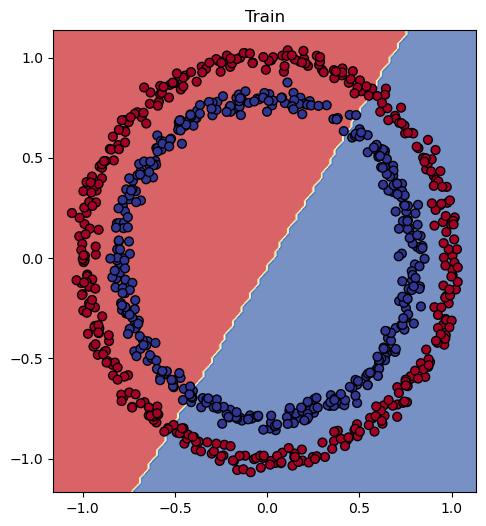

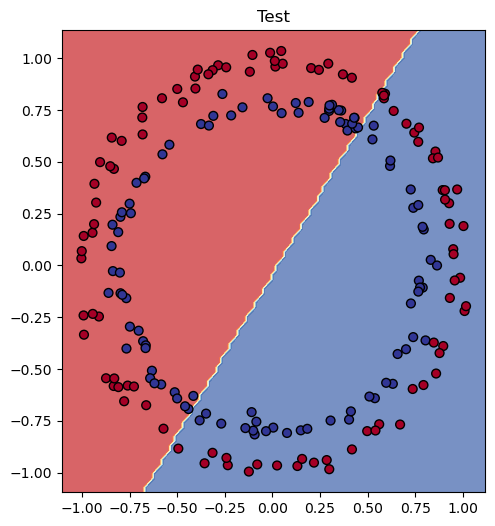

In [35]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, xtrain, ytrain)
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, xtest, ytest) 

### Improving a model (from a model perspective)

Add more layers - give the model more chances to learn about patterns in the data

Add more hidden units - go from 5 hidden units to 10 hidden units

Fit for longer

Changing the activation functions

Change the learning rate

Change the loss function

In [36]:
class CircleModelV1 (nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn. Linear(in_features=2, out_features=10)
        self.layer_2 = nn. Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
    def forward(self, x):
        #z = self.layer_1(x)
        #z = self.layer_2(z)
        #z = self.layer_3(z)
        #return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

In [37]:
model_1=CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [38]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [39]:
# set up loss function
loss_fn=nn.BCEWithLogitsLoss()

# set optimizer
optimizer = torch.optim.SGD(model_0.parameters(),lr=0.1)# set up loss function
loss_fn=nn.BCEWithLogitsLoss()

# set optimizer
optimizer = torch.optim.SGD(model_0.parameters(),lr=0.1)

In [40]:
#Calculate accuracy -out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
    correct=torch.eq(y_true, y_pred).sum().item()
    acc=(correct/len(y_pred)) * 100
    return acc

In [41]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of itrations
epochs=1000

#put data to target device
xtrain,ytrain=xtrain.to(device),ytrain.to(device)
xtest,ytest=xtest.to(device),ytest.to(device)

# build training annd tesing loop
for epoch in range(epochs):
    ## training 
    model_1.train()

    #forward pass
    y_logits= model_1(xtrain).squeeze()
    y_preds= torch.round(torch.sigmoid(y_logits))

    # calculate loss
    loss=loss_fn(y_logits,ytrain)
    acc=accuracy_fn(ytrain,y_preds)

    # optimizer zero gard
    optimizer.zero_grad()

    #loss backword
    loss.backward()

    #optimizer step
    optimizer.step()

    ###testing 
    model_1.eval()
    with torch.inference_mode():
        #forward pass
        test_logits=model_1(xtest).squeeze()
        test_pred=torch.round(torch.sigmoid(test_logits))

        # calculate loss
        test_loss=loss_fn(test_logits,ytest)
        test_acc=accuracy_fn(ytest,test_pred)
    if epoch% 100 == 0:
        print(f"Epoch: {epoch} | loss: {loss:.4f} | accuracy: {acc:.2f}% | test loss: {test_loss:.4f} | test accuracy {test_acc:.2f}%")

Epoch: 0 | loss: 0.6940 | accuracy: 50.88% | test loss: 0.6926 | test accuracy 51.00%
Epoch: 100 | loss: 0.6940 | accuracy: 50.88% | test loss: 0.6926 | test accuracy 51.00%
Epoch: 200 | loss: 0.6940 | accuracy: 50.88% | test loss: 0.6926 | test accuracy 51.00%
Epoch: 300 | loss: 0.6940 | accuracy: 50.88% | test loss: 0.6926 | test accuracy 51.00%
Epoch: 400 | loss: 0.6940 | accuracy: 50.88% | test loss: 0.6926 | test accuracy 51.00%
Epoch: 500 | loss: 0.6940 | accuracy: 50.88% | test loss: 0.6926 | test accuracy 51.00%
Epoch: 600 | loss: 0.6940 | accuracy: 50.88% | test loss: 0.6926 | test accuracy 51.00%
Epoch: 700 | loss: 0.6940 | accuracy: 50.88% | test loss: 0.6926 | test accuracy 51.00%
Epoch: 800 | loss: 0.6940 | accuracy: 50.88% | test loss: 0.6926 | test accuracy 51.00%
Epoch: 900 | loss: 0.6940 | accuracy: 50.88% | test loss: 0.6926 | test accuracy 51.00%


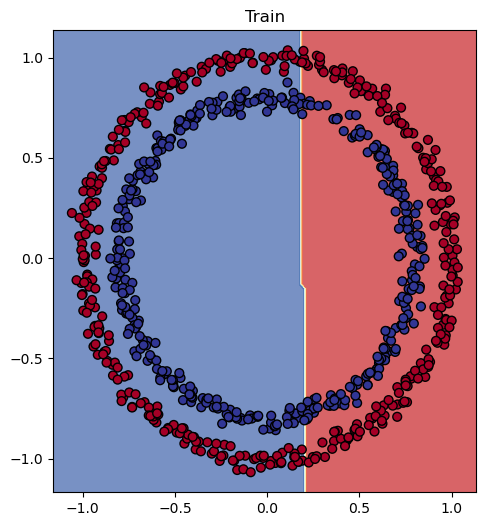

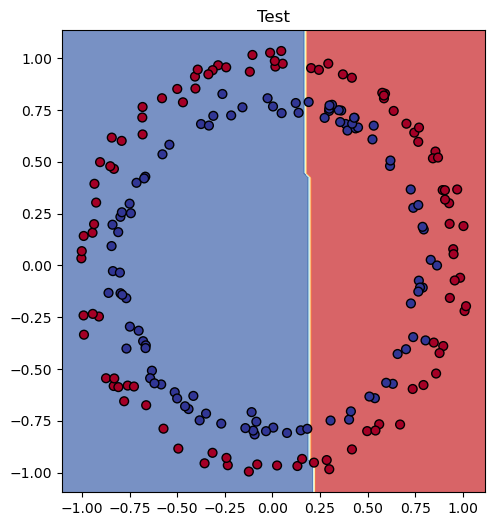

In [42]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, xtrain, ytrain)
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, xtest, ytest) 

## Preparing data to see if our model can fit a straight line
One way to troubleshoot to a larger problem is to test out a smaller problem.

In [45]:
#Create some data (same as notebook 01)
weight= 0.7
bias= 0.3
start = 0
end = 1
step = 0.01
#Create data
X_regression= torch.arange(start, end, step).unsqueeze(dim=1)
y_regression= weight *X_regression + bias # Linear regression formula
#Check the data
print(len(X_regression))
X_regression [:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [46]:
#Create train and test splits
train_split= int(0.8* len(X_regression))
X_train_regression, y_train_regression= X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression= X_regression[train_split:], y_regression[train_split:]
#Check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

In [49]:
def plot_predictions(predictions,x_train, y_train, x_test, y_test):

    plt.figure(figsize=(10,7))
    plt.scatter(x_train.cpu(), y_train.cpu(), c='b', label="training data", s=6)
    plt.scatter(x_test.cpu(), y_test.cpu(), c='g', label="testing data", s=6)
    if predictions!=None:
        plt.scatter(x_test.cpu(), predictions.cpu(), c='r', label="predictions", s=6)
    plt.legend()
    plt.show()


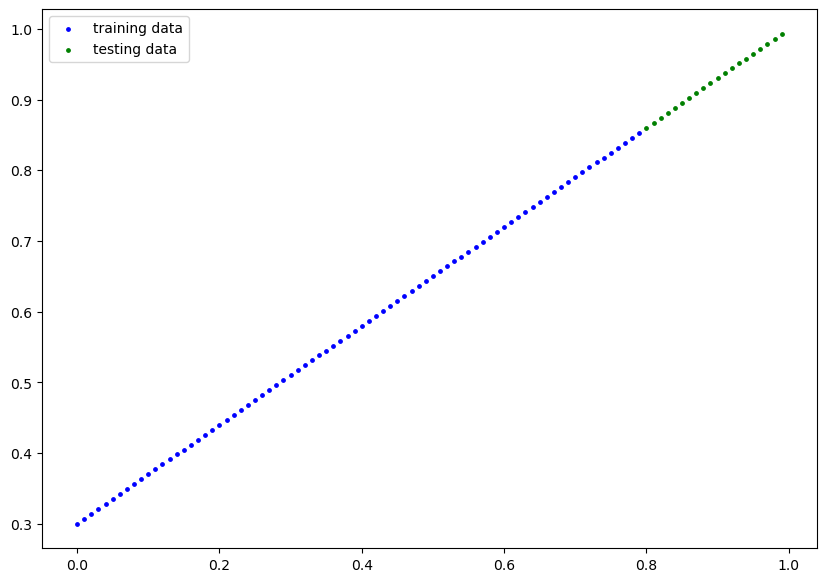

In [50]:
plot_predictions (x_train=X_train_regression,
                    y_train=y_train_regression,
                    x_test=X_test_regression,
                    y_test=y_test_regression,
                      predictions=None);

## Adjusting model_1 to fit a straight line

In [51]:
# using sequntial for making nural network
model_2=nn.Sequential(
    nn.Linear(in_features=1,out_features=10,bias=True),
    nn.Linear(in_features=10,out_features=10,bias=True),
    nn.Linear(in_features=10,out_features=1,bias=True),
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [52]:
# set up loss function
loss_fn=nn.L1Loss()

# set optimizer
optimizer = torch.optim.SGD(model_2.parameters(),lr=0.01)

In [53]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of itrations
epochs=1000

#put data to target device
X_train_regression,y_train_regression=X_train_regression.to(device),y_train_regression.to(device)
X_test_regression,y_test_regression=X_test_regression.to(device),y_test_regression.to(device)

# build training annd tesing loop
for epoch in range(epochs):
    ## training 
    model_2.train()

    #forward pass
    y_preds= model_2(X_train_regression)

    # calculate loss
    loss=loss_fn(y_preds,y_train_regression)

    # optimizer zero gard
    optimizer.zero_grad()

    #loss backword
    loss.backward()

    #optimizer step
    optimizer.step()

    ###testing 
    model_2.eval()
    with torch.inference_mode():
        #forward pass
        test_preds=model_2(X_test_regression)

        # calculate loss
        test_loss=loss_fn(test_preds,y_test_regression)
    if epoch% 100 == 0:
        print(f"Epoch: {epoch} | loss: {loss:.4f} | test loss: {test_loss:.4f} ")

Epoch: 0 | loss: 0.7599 | test loss: 0.9110 
Epoch: 100 | loss: 0.0286 | test loss: 0.0008 
Epoch: 200 | loss: 0.0253 | test loss: 0.0021 
Epoch: 300 | loss: 0.0214 | test loss: 0.0031 
Epoch: 400 | loss: 0.0196 | test loss: 0.0034 
Epoch: 500 | loss: 0.0194 | test loss: 0.0039 
Epoch: 600 | loss: 0.0190 | test loss: 0.0038 
Epoch: 700 | loss: 0.0188 | test loss: 0.0038 
Epoch: 800 | loss: 0.0184 | test loss: 0.0033 
Epoch: 900 | loss: 0.0180 | test loss: 0.0036 


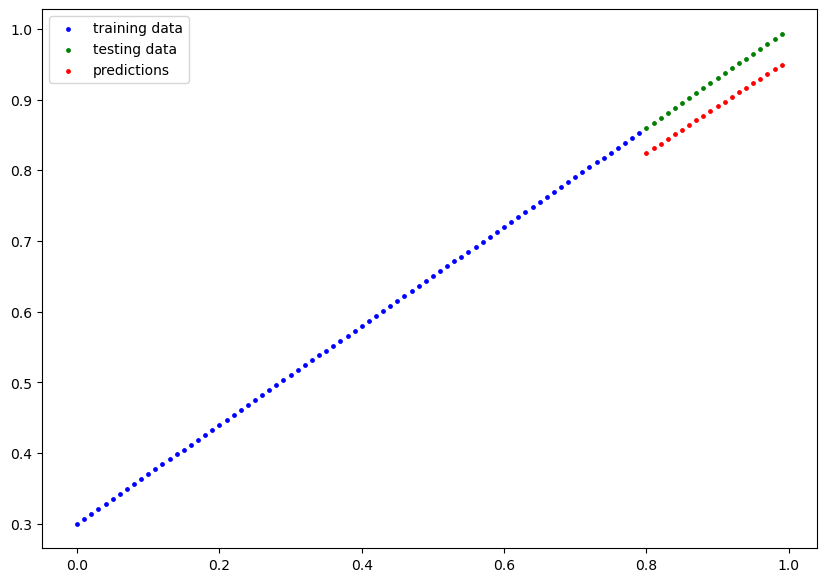

In [54]:
plot_predictions (x_train=X_train_regression,
                    y_train=y_train_regression,
                    x_test=X_test_regression,
                    y_test=y_test_regression,
                      predictions=test_preds);

## creatiinfg a model with non-linearty

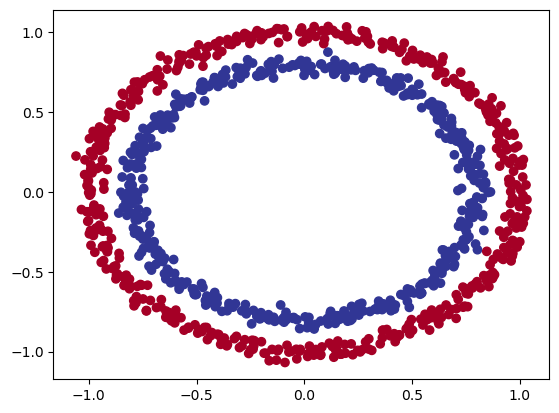

In [55]:
#Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
n_samples = 1000
X, y= make_circles(n_samples,
            noise= 0.03,
            random_state=42)
plt.scatter (X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [56]:
#Convert data to tensors and then to train and test splits
from sklearn.model_selection import train_test_split
#Turn data into tensors
X= torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)
#Split into train and test sets
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [57]:
#Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2, out_features=10)
        self.layer_2=nn.Linear(in_features=10, out_features=10)
        self.layer_3=nn.Linear(in_features=10, out_features=1)
        self.relu=nn.ReLU() # relu is a non-linear activation function
    def forward(self, x):
        #Where should we put our non-linear activation functions?
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [58]:
model_3=CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [59]:
# set up loss function
loss_fn=nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),lr=0.1)

In [60]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of itrations
epochs=2000

#put data to target device
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

# build training annd tesing loop
for epoch in range(epochs):
    ## training 
    model_3.train()

    #forward pass
    y_logits= model_3(X_train).squeeze()
    y_preds= torch.round(torch.sigmoid(y_logits))

    # calculate loss
    loss=loss_fn(y_logits,y_train)
    acc=accuracy_fn(y_train,y_preds)

    # optimizer zero gard
    optimizer.zero_grad()

    #loss backword
    loss.backward()

    #optimizer step
    optimizer.step()

    ###testing 
    model_3.eval()
    with torch.inference_mode():
        #forward pass
        test_logits=model_3(X_test).squeeze()
        test_pred=torch.round(torch.sigmoid(test_logits))

        # calculate loss
        test_loss=loss_fn(test_logits,y_test)
        test_acc=accuracy_fn(y_test,test_pred)
    if epoch% 200 == 0:
        print(f"Epoch: {epoch} | loss: {loss:.4f} | accuracy: {acc:.2f}% | test loss: {test_loss:.4f} | test accuracy {test_acc:.2f}%")

Epoch: 0 | loss: 0.6929 | accuracy: 50.00% | test loss: 0.6932 | test accuracy 50.00%
Epoch: 200 | loss: 0.6898 | accuracy: 53.37% | test loss: 0.6894 | test accuracy 55.00%
Epoch: 400 | loss: 0.6852 | accuracy: 52.75% | test loss: 0.6841 | test accuracy 56.50%
Epoch: 600 | loss: 0.6751 | accuracy: 54.50% | test loss: 0.6729 | test accuracy 56.00%
Epoch: 800 | loss: 0.6516 | accuracy: 64.00% | test loss: 0.6476 | test accuracy 67.50%
Epoch: 1000 | loss: 0.5682 | accuracy: 87.75% | test loss: 0.5738 | test accuracy 86.50%
Epoch: 1200 | loss: 0.3706 | accuracy: 97.75% | test loss: 0.4059 | test accuracy 92.00%
Epoch: 1400 | loss: 0.1718 | accuracy: 99.50% | test loss: 0.2211 | test accuracy 97.50%
Epoch: 1600 | loss: 0.0912 | accuracy: 99.88% | test loss: 0.1274 | test accuracy 99.50%
Epoch: 1800 | loss: 0.0577 | accuracy: 99.88% | test loss: 0.0867 | test accuracy 99.50%


In [61]:
# make predictions
model_3.eval()
with torch.inference_mode():
    y_preds=torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]    

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

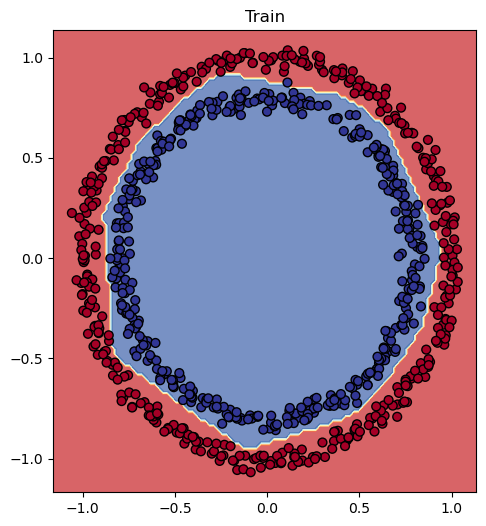

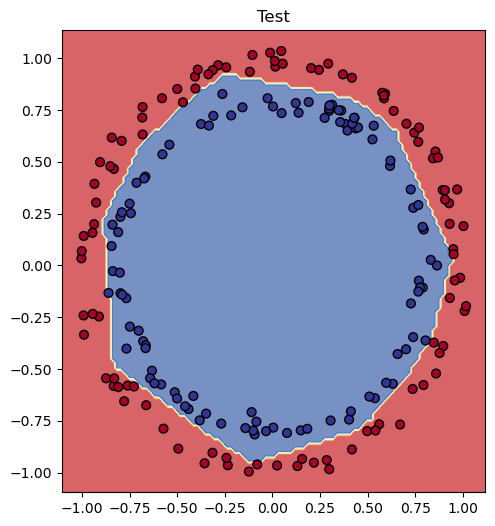

In [62]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) 

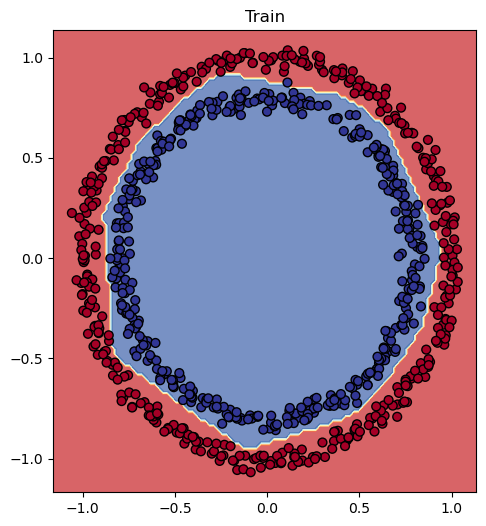

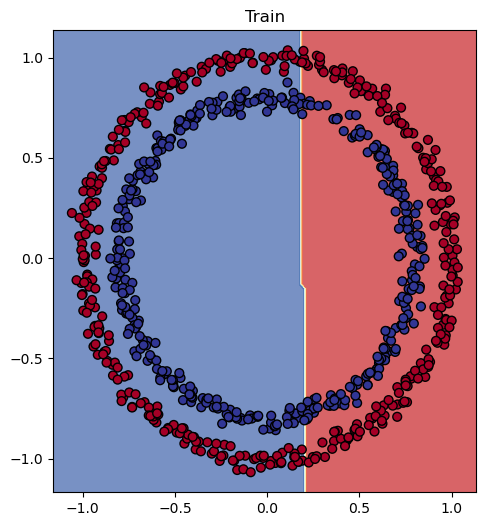

In [63]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, xtrain, ytrain)

## Replicating non-linear activation functions
Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

In [65]:
A =torch.arange(-10,10,1,dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

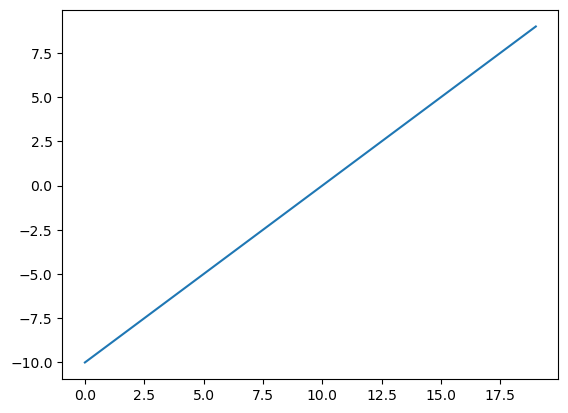

In [66]:
plt.plot(A)

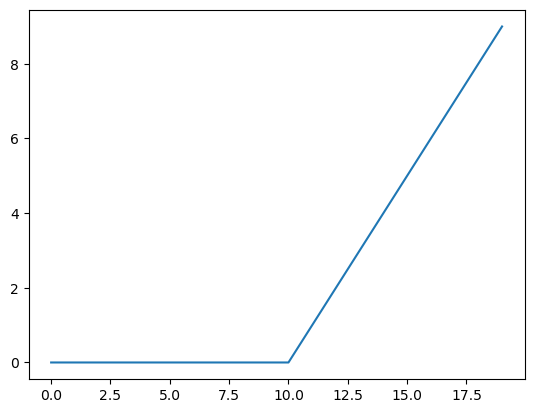

In [67]:
plt.plot(torch.relu(A));

In [68]:
def relu(x:torch.Tensor)->torch.Tensor:
    return torch.maximum(torch.tensor(0),x)

In [69]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

In [70]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))

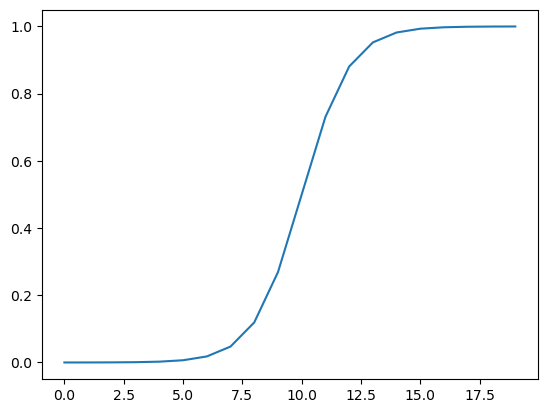

In [71]:
plt.plot(sigmoid(A));

In [4]:
!jupyter nbconvert pytorch_binary_classification.ipynb --to html --template lab

[NbConvertApp] Converting notebook pytorch_binary_classification.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 15 image(s).
[NbConvertApp] Writing 1885974 bytes to pytorch_binary_classification.html


In [6]:
!pip install "nbconvert[webpdf]"

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/35.5 MB ? eta -:--:--
   - -------------------------------------- 1.0/35.5 MB 7.3 MB/s eta 0:00:05
   -- ------------------------------------- 2.6/35.5 MB 7.8 MB/s eta 0:00:05
   ----- ---------------------------------- 4.5/35.5 MB 8.2 MB/s eta 0:00:04
   ------- -------------------------------- 6.3/35.5 MB 8.3 MB/s eta 0:00:04
   --------- ------------------------------ 8.1/35.5 MB 8.5 MB/s eta 0:00:04
   ----------- ---------------------------- 10.0/35.5 MB 8.5 MB/s eta 0:00:03
   ------------- -------------------------- 11.8/35.5 MB 8.6 MB/s eta 0:00:03
   --------------- ------------------------ 13.6/35.5 MB 8.6 MB/s eta 0:00:03
   ----------------- ---------------------- 15.5/35.5 MB 8.6 MB/s eta 0:00:03
   ------------------- -------------------- 17.3/35.5 MB 8.6 MB/s eta 0:00:03
   --------------------- ------------------ 19.1/35.5 MB 8.6 MB/s eta 0:00:02
   -

In [7]:
!playwright install chromium

|                                                                                |   0% of 148.9 MiB
|â– â– â– â– â– â– â– â–                                                                         |  10% of 148.9 MiB
|â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â–                                                                 |  20% of 148.9 MiB
|â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â–                                                         |  30% of 148.9 MiB
|â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â–                                                 |  40% of 148.9 MiB
|â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â–                                         |  50% of 148.9 MiB
|â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â–          

In [8]:
!jupyter nbconvert --to webpdf pytorch_binary_classification.ipynb

[NbConvertApp] Converting notebook pytorch_binary_classification.ipynb to webpdf
[NbConvertApp] WARNING | Alternative text is missing on 15 image(s).
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 874356 bytes to pytorch_binary_classification.pdf
